from google.colab import drive
drive.mount('/content/drive')


In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install git+https://github.com/PatBall1/detectree2.git@JB/refactor

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/PatBall1/detectree2.git (to revision JB/refactor) to /tmp/pip-req-build-72rcmj6p
  Running command git clone -q https://github.com/PatBall1/detectree2.git /tmp/pip-req-build-72rcmj6p
  Running command git checkout -b JB/refactor --track origin/JB/refactor
  Switched to a new branch 'JB/refactor'
  Branch 'JB/refactor' set up to track remote branch 'JB/refactor' from 'origin'.
  Cloning https://github.com/facebookresearch/detectron2.git (to revision 5aeb252b194b93dc2879b4ac34bc51a31b5aee13) to /tmp/pip-install-w9zx5o5d/detectron2_3ea87881c1cf465ebf08e7c793f717e6
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-install-w9zx5o5d/detectron2_3ea87881c1cf465ebf08e7c793f717e6
  Running command git rev-parse -q --verify 'sha^5aeb252b194b93dc2879b4ac34bc51a31b5aee13'
  Running command git fetch -q http

Registering the training (and validation) data. It is possible to register all the locations below. 


Can duplicate to register many train/val folders (e.g. if you have multiple sites to train across)



In [2]:
from detectree2.models.train import register_train_data, remove_registered_data
val_fold = 5
appends = "30_30_0.4"

In [3]:
train_location = "/content/drive/Shareddrives/detectree2/data/Paracou/tiles2016_" + appends + "/train/"
register_train_data(train_location, "Paracou2016", val_fold) # folder, name, validation fold

In [ ]:
train_location = "/content/drive/Shareddrives/detectree2/data/Paracou/tiles2019_" + appends + "/train/"
register_train_data(train_location, "Paracou2019", val_fold)

In [ ]:
train_location = "/content/drive/Shareddrives/detectree2/data/Paracou/tilesUAV_" + appends +"/train/"
register_train_data(train_location, "ParacouUAV", val_fold)

In [4]:
train_location = "/content/drive/Shareddrives/detectree2/data/Danum/tiles_" + appends + "/train/"
register_train_data(train_location, 'Danum', val_fold)

In [5]:
train_location = "/content/drive/Shareddrives/detectree2/data/Sepilok/tilesEast_" + appends + "/train/"
register_train_data(train_location, 'SepilokE', val_fold)

In [6]:
train_location = "/content/drive/Shareddrives/detectree2/data/Sepilok/tilesWest_" + appends + "/train/"
register_train_data(train_location, 'SepilokW', val_fold)

In [ ]:
train_location = "/content/drive/Shareddrives/detectree2/data/BCI_50ha/tilesTEST/train/"
register_train_data(train_location, 'BCI_50ha', val_fold)

## Visualise training data

In [ ]:
from detectron2.utils.visualizer import Visualizer
from detectree2.models.train import combine_dicts
from detectron2.data import DatasetCatalog, MetadataCatalog
import cv2
from PIL import Image

name = "BCI_50ha"
train_location = "/content/drive/Shareddrives/detectree2/data/" + name + "/tilesTEST/train"
dataset_dicts = combine_dicts(train_location, val_fold)
trees_metadata = MetadataCatalog.get(name + "_train")
#dataset_dicts = get_tree_dicts("./")
for d in dataset_dicts:
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=trees_metadata, scale=0.5)
    out = visualizer.draw_dataset_dict(d)
    image = cv2.cvtColor(out.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
    display(Image.fromarray(image))

Output hidden; open in https://colab.research.google.com to view.

## Train!

GPU/CUDA should be available here. Chose which datasets you want to train and test on with `trains` and `tests`. Set up the configurations with `setup_cfg`.

If tuning has been completed, train and validation datasets can be combined in `trains` for full training.

In [7]:
from detectree2.models.train import MyTrainer, setup_cfg
#from detectree2.models.train import setup_cfg

# Set the base (pre-trained) model from the detectron2 model_zoo
base_model = "COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"
# Set the names of the registered train and test sets
# pretrained model?
# trained_model = "/content/drive/Shareddrives/detectree2/models/220629_ParacouSepilokDanum_JB.pth"
#trains = ("Paracou_train", "Paracou2019_train", "ParacouUAV_train", "Danum_train", "SepilokEast_train", "SepilokWest_train")
#tests = ("Paracou_val", "Paracou2019_val", "ParacouUAV_val", "Danum_val", "SepilokEast_val", "SepilokWest_val")

#trains = ("BCI_50ha_train",)
#tests = ("BCI_50ha_val",)
#out_dir = "/content/drive/Shareddrives/detectree2/220818_Paracou"

#cfg = setup_cfg(base_model, trains, tests, workers = 4, eval_period=100, max_iter=3000, out_dir=out_dir) # update_model arg can be used to load in trained  model

Get training! Patience sets the number of evaluation periods that will be undergone without improvement in model performance before training will be terminated (best model will be saved).

In [8]:
#trained_model = "/content/drive/Shareddrives/detectree2/models/220629_ParacouSepilokDanum_JB.pth"

names = ["Paracou2016", "Danum", "SepilokE", "SepilokW"]
for name in names:
    trains = (name + "_train",)
    tests = (name + "_val",)
    out_dir = "/content/drive/Shareddrives/detectree2/220819_" + name

    cfg = setup_cfg(base_model, trains, tests, workers = 4, eval_period=25,
                    max_iter=5000, out_dir=out_dir, resize = True) # update_model arg can be used to load in trained  model

    trainer = MyTrainer(cfg, patience = 5)
    #trainer = MyTrainer(cfg, patience = 5) 
    trainer.resume_or_load(resume=False)
    trainer.train()

[08/19 02:30:17 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:31:06 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in training: [ResizeShortestEdge(short_edge_length=(640, 672, 704, 736, 768, 800), max_size=1333, sample_style='choice'), RandomFlip()]
[08/19 02:31:15 d2.data.build]: Distribution of instances among all 1 categories:
|  category  | #instances   |
|:----------:|:-------------|
|    tree    | 773          |
|            |              |
[08/19 02:31:15 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:31:15 d2.data.common]: Serialized dataset takes 0.70 MiB


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
model_final_a3ec72.pkl: 254MB [00:07, 33.6MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
/usr/local/lib/python3.7/dist-packages/torch/functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2894.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[08/19 02:31:54 d2.utils.events]:  eta: 1:17:01  iter: 19  total_loss: 3.582  loss_cls: 0.5899  loss_box_reg: 0.5727  loss_mask: 0.6906  loss_rpn_cls: 1.394  loss_rpn_loc: 0.3624  time: 0.9234  data_time: 0.0654  lr: 0.00015917  max_mem: 3489M
[08/19 02:31:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:31:59 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:31:59 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:31:59 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:31:59 d2.evaluation.coco_evaluation]: Trying to convert 'Paracou2016_val' to COCO format ...
[08/19 02:31:59 d2.data.datasets.coco]: Converting annotations of dataset 'Paracou2016_val' to COCO format ...)


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:32:00 d2.data.datasets.coco]: Converting dataset dicts into COCO format
[08/19 02:32:00 d2.data.datasets.coco]: Conversion finished, #images: 13, #annotations: 773
[08/19 02:32:00 d2.data.datasets.coco]: Caching COCO format annotations at 'eval/Paracou2016_val_coco_format.json' ...
[08/19 02:32:00 d2.evaluation.evaluator]: Start inference on 13 batches
[08/19 02:32:04 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0006 s/iter. Inference: 0.1452 s/iter. Eval: 0.1980 s/iter. Total: 0.3438 s/iter. ETA=0:00:00
[08/19 02:32:05 d2.evaluation.evaluator]: Total inference time: 0:00:02.900751 (0.362594 s / iter per device, on 1 devices)
[08/19 02:32:05 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.145428 s / iter per device, on 1 devices)
[08/19 02:32:05 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:32:05 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:32:05 d2.eval

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:32:09 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:32:09 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:32:09 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:32:09 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:32:09 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:32:13 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0008 s/iter. Inference: 0.1423 s/iter. Eval: 0.1997 s/iter. Total: 0.3428 s/iter. ETA=0:00:00
[08/19 02:32:14 d2.evaluation.evaluator]: Total inference time: 0:00:02.865423 (0.358178 s / iter per device, on 1 devices)
[08/19 02:32:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.142846 s / iter per device, on 1 devices)
[08/19 02:32:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:32:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:32:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:32:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:32:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:32:14 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:32:48 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0010 s/iter. Inference: 0.1495 s/iter. Eval: 0.2538 s/iter. Total: 0.4043 s/iter. ETA=0:00:00
[08/19 02:32:48 d2.evaluation.evaluator]: Total inference time: 0:00:03.316893 (0.414612 s / iter per device, on 1 devices)
[08/19 02:32:48 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150077 s / iter per device, on 1 devices)
[08/19 02:32:48 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:32:48 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:32:49 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:32:49 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:32:49 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:32:49 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:32:52 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:32:52 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:32:52 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:32:52 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:32:52 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:32:57 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0011 s/iter. Inference: 0.1493 s/iter. Eval: 0.2091 s/iter. Total: 0.3595 s/iter. ETA=0:00:00
[08/19 02:32:57 d2.evaluation.evaluator]: Total inference time: 0:00:03.004288 (0.375536 s / iter per device, on 1 devices)
[08/19 02:32:57 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.149157 s / iter per device, on 1 devices)
[08/19 02:32:57 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:32:57 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:32:57 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:32:57 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:32:57 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:32:57 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:33:30 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0008 s/iter. Inference: 0.1524 s/iter. Eval: 0.2156 s/iter. Total: 0.3688 s/iter. ETA=0:00:00
[08/19 02:33:31 d2.evaluation.evaluator]: Total inference time: 0:00:03.069467 (0.383683 s / iter per device, on 1 devices)
[08/19 02:33:31 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.152351 s / iter per device, on 1 devices)
[08/19 02:33:31 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:33:31 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:33:31 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:33:31 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:33:31 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:33:31 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:33:35 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:33:35 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:33:35 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:33:35 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:33:35 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:33:39 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1512 s/iter. Eval: 0.2087 s/iter. Total: 0.3611 s/iter. ETA=0:00:00
[08/19 02:33:40 d2.evaluation.evaluator]: Total inference time: 0:00:03.010693 (0.376337 s / iter per device, on 1 devices)
[08/19 02:33:40 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151013 s / iter per device, on 1 devices)
[08/19 02:33:40 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:33:40 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:33:40 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:33:40 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:33:40 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:33:40 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:34:13 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0011 s/iter. Inference: 0.1508 s/iter. Eval: 0.2136 s/iter. Total: 0.3656 s/iter. ETA=0:00:00
[08/19 02:34:14 d2.evaluation.evaluator]: Total inference time: 0:00:03.040223 (0.380028 s / iter per device, on 1 devices)
[08/19 02:34:14 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150602 s / iter per device, on 1 devices)
[08/19 02:34:14 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:34:14 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:34:14 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:34:14 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:34:14 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:34:14 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:34:17 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:34:17 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:34:17 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:34:17 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:34:17 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:34:22 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1509 s/iter. Eval: 0.2118 s/iter. Total: 0.3639 s/iter. ETA=0:00:00
[08/19 02:34:23 d2.evaluation.evaluator]: Total inference time: 0:00:03.284425 (0.410553 s / iter per device, on 1 devices)
[08/19 02:34:23 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151208 s / iter per device, on 1 devices)
[08/19 02:34:23 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:34:23 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:34:23 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:34:23 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:34:23 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:34:23 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:34:57 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0016 s/iter. Inference: 0.1516 s/iter. Eval: 0.2152 s/iter. Total: 0.3685 s/iter. ETA=0:00:00
[08/19 02:34:57 d2.evaluation.evaluator]: Total inference time: 0:00:03.053451 (0.381681 s / iter per device, on 1 devices)
[08/19 02:34:57 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151240 s / iter per device, on 1 devices)
[08/19 02:34:57 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:34:57 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:34:57 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:34:57 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:34:58 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.04 seconds.
[08/19 02:34:58 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:35:01 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:35:01 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:35:01 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:35:01 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:35:01 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:35:06 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1508 s/iter. Eval: 0.2130 s/iter. Total: 0.3650 s/iter. ETA=0:00:00
[08/19 02:35:06 d2.evaluation.evaluator]: Total inference time: 0:00:03.035440 (0.379430 s / iter per device, on 1 devices)
[08/19 02:35:06 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150580 s / iter per device, on 1 devices)
[08/19 02:35:06 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:35:06 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:35:06 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:35:06 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:35:06 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:35:06 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:35:39 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1500 s/iter. Eval: 0.2083 s/iter. Total: 0.3596 s/iter. ETA=0:00:00
[08/19 02:35:40 d2.evaluation.evaluator]: Total inference time: 0:00:03.007217 (0.375902 s / iter per device, on 1 devices)
[08/19 02:35:40 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150941 s / iter per device, on 1 devices)
[08/19 02:35:40 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:35:40 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:35:40 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:35:40 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:35:40 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:35:40 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:35:43 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:35:43 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:35:43 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:35:43 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:35:43 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:35:48 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0008 s/iter. Inference: 0.1499 s/iter. Eval: 0.2092 s/iter. Total: 0.3600 s/iter. ETA=0:00:00
[08/19 02:35:49 d2.evaluation.evaluator]: Total inference time: 0:00:03.009742 (0.376218 s / iter per device, on 1 devices)
[08/19 02:35:49 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150298 s / iter per device, on 1 devices)
[08/19 02:35:49 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:35:49 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:35:49 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:35:49 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:35:49 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:35:49 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:36:20 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0008 s/iter. Inference: 0.1506 s/iter. Eval: 0.2111 s/iter. Total: 0.3625 s/iter. ETA=0:00:00
[08/19 02:36:21 d2.evaluation.evaluator]: Total inference time: 0:00:03.016125 (0.377016 s / iter per device, on 1 devices)
[08/19 02:36:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.149838 s / iter per device, on 1 devices)
[08/19 02:36:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:36:21 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:36:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:36:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:36:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:36:21 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:36:24 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:36:24 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:36:24 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:36:24 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:36:24 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:36:29 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0010 s/iter. Inference: 0.1506 s/iter. Eval: 0.2110 s/iter. Total: 0.3626 s/iter. ETA=0:00:00
[08/19 02:36:30 d2.evaluation.evaluator]: Total inference time: 0:00:03.036473 (0.379559 s / iter per device, on 1 devices)
[08/19 02:36:30 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150670 s / iter per device, on 1 devices)
[08/19 02:36:30 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:36:30 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:36:30 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:36:30 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:36:30 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:36:30 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:37:03 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0008 s/iter. Inference: 0.1515 s/iter. Eval: 0.2092 s/iter. Total: 0.3615 s/iter. ETA=0:00:00
[08/19 02:37:03 d2.evaluation.evaluator]: Total inference time: 0:00:03.030764 (0.378846 s / iter per device, on 1 devices)
[08/19 02:37:03 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151869 s / iter per device, on 1 devices)
[08/19 02:37:03 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:37:03 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:37:03 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:37:04 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:37:04 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.04 seconds.
[08/19 02:37:04 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:37:07 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:37:07 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:37:07 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:37:07 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:37:07 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:37:12 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0008 s/iter. Inference: 0.1504 s/iter. Eval: 0.2106 s/iter. Total: 0.3618 s/iter. ETA=0:00:00
[08/19 02:37:12 d2.evaluation.evaluator]: Total inference time: 0:00:03.020734 (0.377592 s / iter per device, on 1 devices)
[08/19 02:37:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150492 s / iter per device, on 1 devices)
[08/19 02:37:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:37:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:37:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:37:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:37:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.04 seconds.
[08/19 02:37:12 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:37:43 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1510 s/iter. Eval: 0.2122 s/iter. Total: 0.3645 s/iter. ETA=0:00:00
[08/19 02:37:44 d2.evaluation.evaluator]: Total inference time: 0:00:03.038550 (0.379819 s / iter per device, on 1 devices)
[08/19 02:37:44 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151095 s / iter per device, on 1 devices)
[08/19 02:37:44 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:37:44 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:37:44 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:37:44 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:37:44 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:37:44 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:37:47 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:37:47 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:37:47 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:37:47 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:37:47 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:37:52 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0011 s/iter. Inference: 0.1504 s/iter. Eval: 0.2127 s/iter. Total: 0.3643 s/iter. ETA=0:00:00
[08/19 02:37:53 d2.evaluation.evaluator]: Total inference time: 0:00:03.023537 (0.377942 s / iter per device, on 1 devices)
[08/19 02:37:53 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150429 s / iter per device, on 1 devices)
[08/19 02:37:53 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:37:53 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:37:53 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:37:53 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:37:53 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:37:53 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:38:26 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0010 s/iter. Inference: 0.1507 s/iter. Eval: 0.2094 s/iter. Total: 0.3611 s/iter. ETA=0:00:00
[08/19 02:38:27 d2.evaluation.evaluator]: Total inference time: 0:00:03.031164 (0.378896 s / iter per device, on 1 devices)
[08/19 02:38:27 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150676 s / iter per device, on 1 devices)
[08/19 02:38:27 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:38:27 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:38:27 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:38:27 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:38:27 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:38:27 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:38:30 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:38:30 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:38:30 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:38:30 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:38:30 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:38:35 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1498 s/iter. Eval: 0.2127 s/iter. Total: 0.3638 s/iter. ETA=0:00:00
[08/19 02:38:36 d2.evaluation.evaluator]: Total inference time: 0:00:03.046503 (0.380813 s / iter per device, on 1 devices)
[08/19 02:38:36 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150145 s / iter per device, on 1 devices)
[08/19 02:38:36 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:38:36 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:38:36 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:38:36 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:38:36 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:38:36 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:39:07 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1516 s/iter. Eval: 0.2112 s/iter. Total: 0.3640 s/iter. ETA=0:00:00
[08/19 02:39:07 d2.evaluation.evaluator]: Total inference time: 0:00:03.035679 (0.379460 s / iter per device, on 1 devices)
[08/19 02:39:07 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151600 s / iter per device, on 1 devices)
[08/19 02:39:07 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:39:07 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:39:07 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:39:07 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:39:07 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:39:07 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:39:11 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:39:11 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:39:11 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:39:11 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:39:11 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:39:15 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0012 s/iter. Inference: 0.1506 s/iter. Eval: 0.2096 s/iter. Total: 0.3614 s/iter. ETA=0:00:00
[08/19 02:39:16 d2.evaluation.evaluator]: Total inference time: 0:00:03.016517 (0.377065 s / iter per device, on 1 devices)
[08/19 02:39:16 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151092 s / iter per device, on 1 devices)
[08/19 02:39:16 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:39:16 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:39:16 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:39:16 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:39:16 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.04 seconds.
[08/19 02:39:16 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:39:49 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0011 s/iter. Inference: 0.1508 s/iter. Eval: 0.2167 s/iter. Total: 0.3686 s/iter. ETA=0:00:00
[08/19 02:39:50 d2.evaluation.evaluator]: Total inference time: 0:00:03.336750 (0.417094 s / iter per device, on 1 devices)
[08/19 02:39:50 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151895 s / iter per device, on 1 devices)
[08/19 02:39:50 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:39:50 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:39:50 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:39:50 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:39:50 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.05 seconds.
[08/19 02:39:50 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:39:55 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:39:55 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:39:55 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:39:55 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:39:55 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:39:59 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0009 s/iter. Inference: 0.1506 s/iter. Eval: 0.2137 s/iter. Total: 0.3652 s/iter. ETA=0:00:00
[08/19 02:40:00 d2.evaluation.evaluator]: Total inference time: 0:00:03.044810 (0.380601 s / iter per device, on 1 devices)
[08/19 02:40:00 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150710 s / iter per device, on 1 devices)
[08/19 02:40:00 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:40:00 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:40:00 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:40:00 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:40:00 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:40:00 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:40:31 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0010 s/iter. Inference: 0.1499 s/iter. Eval: 0.2145 s/iter. Total: 0.3654 s/iter. ETA=0:00:00
[08/19 02:40:32 d2.evaluation.evaluator]: Total inference time: 0:00:03.062416 (0.382802 s / iter per device, on 1 devices)
[08/19 02:40:32 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.149791 s / iter per device, on 1 devices)
[08/19 02:40:32 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:40:32 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:40:32 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:40:32 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:40:32 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:40:32 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:40:35 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:40:35 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:40:35 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:40:35 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:40:35 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:40:40 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0010 s/iter. Inference: 0.1501 s/iter. Eval: 0.2118 s/iter. Total: 0.3629 s/iter. ETA=0:00:00
[08/19 02:40:41 d2.evaluation.evaluator]: Total inference time: 0:00:03.029282 (0.378660 s / iter per device, on 1 devices)
[08/19 02:40:41 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.149815 s / iter per device, on 1 devices)
[08/19 02:40:41 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:40:41 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:40:41 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:40:41 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:40:41 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.04 seconds.
[08/19 02:40:41 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:41:11 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0011 s/iter. Inference: 0.1511 s/iter. Eval: 0.2141 s/iter. Total: 0.3662 s/iter. ETA=0:00:00
[08/19 02:41:12 d2.evaluation.evaluator]: Total inference time: 0:00:03.036884 (0.379611 s / iter per device, on 1 devices)
[08/19 02:41:12 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151021 s / iter per device, on 1 devices)
[08/19 02:41:12 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:41:12 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:41:12 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:41:12 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:41:12 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.04 seconds.
[08/19 02:41:12 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:41:15 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:41:15 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:41:15 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:41:15 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:41:15 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:41:20 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0010 s/iter. Inference: 0.1505 s/iter. Eval: 0.2129 s/iter. Total: 0.3644 s/iter. ETA=0:00:00
[08/19 02:41:21 d2.evaluation.evaluator]: Total inference time: 0:00:03.033493 (0.379187 s / iter per device, on 1 devices)
[08/19 02:41:21 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150606 s / iter per device, on 1 devices)
[08/19 02:41:21 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:41:21 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:41:21 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:41:21 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:41:21 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:41:21 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:41:52 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0009 s/iter. Inference: 0.1516 s/iter. Eval: 0.2093 s/iter. Total: 0.3619 s/iter. ETA=0:00:00
[08/19 02:41:52 d2.evaluation.evaluator]: Total inference time: 0:00:03.023126 (0.377891 s / iter per device, on 1 devices)
[08/19 02:41:52 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.151276 s / iter per device, on 1 devices)
[08/19 02:41:52 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:41:52 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:41:53 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:41:53 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:41:53 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:41:53 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:41:56 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:41:56 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:41:56 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:41:56 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:41:56 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:42:01 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0011 s/iter. Inference: 0.1501 s/iter. Eval: 0.2096 s/iter. Total: 0.3608 s/iter. ETA=0:00:00
[08/19 02:42:01 d2.evaluation.evaluator]: Total inference time: 0:00:03.007242 (0.375905 s / iter per device, on 1 devices)
[08/19 02:42:01 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150481 s / iter per device, on 1 devices)
[08/19 02:42:02 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:42:02 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:42:02 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:42:02 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:42:02 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.04 seconds.
[08/19 02:42:02 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:42:32 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0008 s/iter. Inference: 0.1505 s/iter. Eval: 0.2103 s/iter. Total: 0.3616 s/iter. ETA=0:00:00
[08/19 02:42:33 d2.evaluation.evaluator]: Total inference time: 0:00:03.011152 (0.376394 s / iter per device, on 1 devices)
[08/19 02:42:33 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.150362 s / iter per device, on 1 devices)
[08/19 02:42:33 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:42:33 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:42:33 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:42:33 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:42:33 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:42:33 d2.evaluation.fast

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:42:36 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[08/19 02:42:36 d2.data.common]: Serializing 13 elements to byte tensors and concatenating them all ...
[08/19 02:42:36 d2.data.common]: Serialized dataset takes 0.70 MiB
WARNING [08/19 02:42:36 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[08/19 02:42:36 d2.evaluation.evaluator]: Start inference on 13 batches


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


[08/19 02:42:41 d2.evaluation.evaluator]: Inference done 11/13. Dataloading: 0.0009 s/iter. Inference: 0.1501 s/iter. Eval: 0.2123 s/iter. Total: 0.3632 s/iter. ETA=0:00:00
[08/19 02:42:42 d2.evaluation.evaluator]: Total inference time: 0:00:03.016674 (0.377084 s / iter per device, on 1 devices)
[08/19 02:42:42 d2.evaluation.evaluator]: Total inference pure compute time: 0:00:01 (0.149814 s / iter per device, on 1 devices)
[08/19 02:42:42 d2.evaluation.coco_evaluation]: Preparing results for COCO format ...
[08/19 02:42:42 d2.evaluation.coco_evaluation]: Saving results to eval/coco_instances_results.json
[08/19 02:42:42 d2.evaluation.coco_evaluation]: Evaluating predictions with unofficial COCO API...
Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
[08/19 02:42:42 d2.evaluation.fast_eval_api]: Evaluate annotation type *bbox*
[08/19 02:42:42 d2.evaluation.fast_eval_api]: COCOeval_opt.evaluate() finished in 0.03 seconds.
[08/19 02:42:42 d2.evaluation.fast

FileNotFoundError: ignored

## Plot the loss

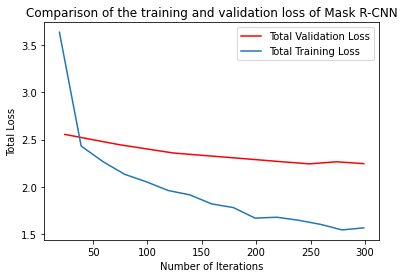

In [9]:
### Plot training and validation loss on the same plot to check how the training has gone

import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

out_dir = "/content/drive/Shareddrives/detectree2/220818_" + names[0]
experiment_folder = out_dir

experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
    [x['iteration'] for x in experiment_metrics if 'validation_loss' in x], 
    [x['validation_loss'] for x in experiment_metrics if 'validation_loss' in x], label='Total Validation Loss', color='red')
plt.plot(
    [x['iteration'] for x in experiment_metrics if 'total_loss' in x], 
    [x['total_loss'] for x in experiment_metrics if 'total_loss' in x], label='Total Training Loss')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss of Mask R-CNN')
plt.ylabel('Total Loss')
plt.xlabel('Number of Iterations')
plt.show()

### How did the AP50 change through time?

Early stopping means that if the AP50 stops increasing after the ```patience``` interval, training will terminate and the best model will be saved.

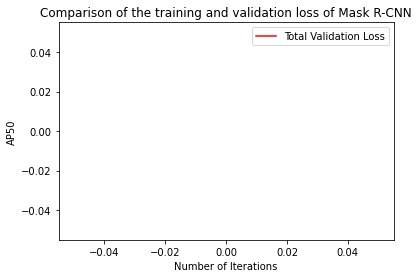

In [10]:
### Plot ap50

import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir
name = names[0]
experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
    [x['iteration'] for x in experiment_metrics if name + '_val/segm/AP50' in x], 
    [x[name + '_val/segm/AP50'] for x in experiment_metrics if name + '_val/segm/AP50' in x], label='Total Validation Loss', color='red')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss of Mask R-CNN')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

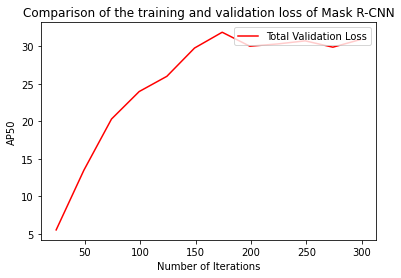

In [11]:
### Plot ap50

import json
import matplotlib.pyplot as plt
from detectree2.models.train import load_json_arr

experiment_folder = out_dir
name = names[0]
experiment_metrics = load_json_arr(experiment_folder + '/metrics.json')

plt.plot(
    [x['iteration'] for x in experiment_metrics if 'segm/AP50' in x], 
    [x['segm/AP50'] for x in experiment_metrics if 'segm/AP50' in x], label='Total Validation Loss', color='red')

plt.legend(loc='upper right')
plt.title('Comparison of the training and validation loss of Mask R-CNN')
plt.ylabel('AP50')
plt.xlabel('Number of Iterations')
plt.show()

## Make predictions on the validation set and visualise

In [12]:
# Setup to predict on new images, here setting up for the trees_test dataset, but can also use this setup
# for predicting on individual images as seen 2 cells down
import os
from detectron2.utils.visualizer import ColorMode
from detectron2.engine import DefaultPredictor

# Weights automatically saved to OUTPUT_DIR + model_final.pth following training
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_3.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.20
#cfg.DATASETS.TEST = ("trees_test",)
predictor = DefaultPredictor(cfg)

AssertionError: ignored

In [ ]:
from detectree2.models.train import combine_dicts
import cv2
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog
from PIL import Image

#name = "Paracou"
train_location = "/content/drive/Shareddrives/detectree2/data/"+ name + "/tilesTEST/train/"
MetadataCatalog.get(name + "train").set(thing_classes=['tree'])
trees_metadata = MetadataCatalog.get(name + "train")
dataset_dicts = combine_dicts(train_location, val_fold, mode='val')
for d in dataset_dicts:
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    v = Visualizer(img[:, :, ::-1], metadata=trees_metadata, scale=0.7)   # remove the colors of unsegmented pixels
    v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
    image = cv2.cvtColor(v.get_image()[:, :, ::-1], cv2.COLOR_BGR2RGB)
    display(Image.fromarray(image))

Output hidden; open in https://colab.research.google.com to view.